# Теория вероятностей и математическая статистика

## Урок 7

## Линейная регрессия. Двухвыборочный t-тест. A/B-тестирование

### Линейная регрессия

В общем виде __модель регрессии__ — это любая модель зависимости (__объясняемой__) количественной переменной $y$ от другой или нескольких других переменных (__факторов__) $x_i$. Такую модель можно записать в виде:
$$y = f_b(x_1, \dots, x_m) + \varepsilon,$$
где $f_b(x)$ — некоторая функция, имеющая набор параметров $b$, а $\varepsilon$ — случайная ошибка. При этом на ошибку накладывается условие, что её математическое ожидание равно $0$:
$$M(\varepsilon) = 0$$

__В чём здесь суть__. Участвующие в этой модели переменные удобно воспринимать как некоторые случайные величины, т.е. случайное поведение переменной $y$ моделируется в виде некоторой функции от случайных факторов $x_i$, а остаток от всего этого (т.е. та часть этой зависимости, которая осталась неучтённой) — это и есть случайная ошибка $\varepsilon$.

Модель регрессии называется __линейной__, если функция $f_b(x)$ является линейной, т.е. модель имеет вид:
$$y = b_0 + b_1 x_1 + \dots + b_m x_m + \varepsilon$$

Важным частным случаем линейной регрессии является __парная регрессия__. При парной регрессии используется только один фактор, т.е. модель имеет вид:
$$y = b_0 + b_1 x + \varepsilon$$

На практике такая модель имеет вид:
$$Y = b_0 + b_1 X + E,$$
где $X$ — выборка из значений фактора $x$, $Y$ — выборка из значений переменной $y$, а $E$ — значения ошибок модели на каждом объекте (т.е. реализации случайной величины $\varepsilon$). В этом случае условие $M(\varepsilon) = 0$ трансформируется в условие $\overline{E} = 0$, где $\overline{E}$ — выборочное среднее ошибок.

__Коэффициенты парной регрессии__ можно найти по формуле:
$$b_1 = \frac{\sigma_{XY}}{\sigma^2_X}, \:\:
b_0 = \overline{Y} - b_1 \cdot {\overline{X}},$$
где $\sigma^2_X$ — выборочная дисперсия, $\sigma_{XY}$ — выборочная ковариация.

__Пример 1__

Рассмотрим данные со значениями площадей квартир в квадратных метрах (массив `x1`) и соответствующими им ценами на квартиры в тысячах долларов (массив `y1`), приведеннные для $12$ наблюдений. По этим данным построим модель линейной регрессии.

In [ ]:
import numpy as np

In [ ]:
x1 = np.array([80, 90, 85, 115, 85, 85, 90, 80, 105, 110, 65, 100], dtype=np.float64)
y1 = np.array([150, 160, 155, 175, 140, 150, 140, 155, 165, 190, 140, 165])

Найдём коэффициенты линейной регрессии:

In [ ]:
b1 = np.cov(x1, y1, ddof=1)[0, 1] / np.var(x1, ddof=1)
b0 = y1.mean() - b1 * x1.mean()

b0, b1

(77.8996282527881, 0.8717472118959109)

_Замечание_. В данной формуле не нужно обязательно использовать смещённую или несмещённую оценку, но важно, конечно, использовать один и тот же тип оценки и для ковариации, и для дисперсии.

Итак, модель линейной регрессии имеет вид:
$$y = 77.9 + 0.87 \cdot x,$$
т.е. с увеличением площади квартиры на $1$ квадратный метр цена возрастет на $0.87$ тысячи долларов. Визуализируем полученные результаты на графике.

In [ ]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

Text(0, 0.5, 'цена')

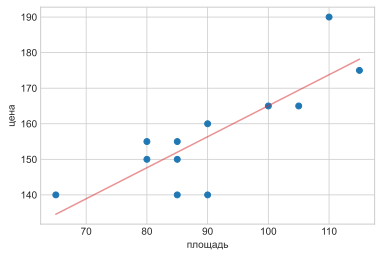

In [ ]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='C3', alpha=0.5)

plt.xlabel('площадь')
plt.ylabel('цена');

Проверим, что средняя ошибка модели действительно равна нулю. Для этого запишем массив из предсказанных значений:

In [ ]:
x1

array([ 80.,  90.,  85., 115.,  85.,  85.,  90.,  80., 105., 110.,  65.,
       100.])

In [ ]:
z1 = b0 + b1 * x1

z1

array([147.6394052 , 156.35687732, 151.99814126, 178.15055762,
       151.99814126, 151.99814126, 156.35687732, 147.6394052 ,
       169.4330855 , 173.79182156, 134.56319703, 165.07434944])

Теперь из него получим массив ошибок:

In [ ]:
e1 = y1 - z1

e1

array([  2.3605948 ,   3.64312268,   3.00185874,  -3.15055762,
       -11.99814126,  -1.99814126, -16.35687732,   7.3605948 ,
        -4.4330855 ,  16.20817844,   5.43680297,  -0.07434944])

Средняя ошибка:

In [ ]:
e1.mean()

9.473903143468002e-15

__Метод наименьших квадратов__

В общем случае, когда факторов больше одного, коэффициенты можно также посчитать аналитически с помощью __метода наименьших квадратов__. Модель имеет следующий вид:
$$Y = b_0 + b_1 X_1 + b_2 X_2 + \dots + b_m X_m + E,$$
где $X_i$ — выборка из значений $i$-го фактора.

Как правило, для удобства нахождения оптимальных коэффициентов к каждому объекту добавляется «нулевой фактор» $x_0$, который равен $1$ для каждого объекта. Это нужно просто чтобы модель записывалась в более симметричном виде:
$$Y = b_0 X_0 + b_1 X_1 + b_2 X_2 + \dots + b_m X_m + E,$$
где выборка $X_0$ полностью состоит из единиц.

Такая форма записи модели эквивалентна матричной форме:
$$Y = X \cdot b + E,$$
где $X$ — матрица объект признак (т.е. элемент $x_{ij}$ из этой матрицы является $j$-м признаком $i$-го объекта), $b = (b_0, b_1, \dots, b_m)$ — вектор коэффициентов модели, «$\cdot$» — операция матричного умножения.

Итак, __метод наименьших квадратов__ заключается в минимизации расстояния между векторами $Y$ и $X \cdot b$:
$$\| Y - X \cdot b \| \rightarrow \min_b$$

Такая задача имеет аналитическое __решение__:
$$b = \left( X^\top X \right)^{-1} X^\top Y$$

__Пример 2__

Рассмотрим данные о хоккеистах и попробуем построить модель регрессии, которая будет предсказывать возраст хоккеиста по его росту и весу.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('hockey_players.csv')
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


In [ ]:
x2 = df[['height', 'weight']].values

y2 = df['age'].values
y2

array([24.95277207, 21.11978097, 25.229295  , ..., 26.82546201,
       26.01232033, 20.39698836])

К матрице $X$ (массив `x2`) нужно также добавить столбец из $1$, соответствующий нулевому фактору.

In [ ]:
x2.shape

(3294, 2)

In [ ]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

In [ ]:
x2.shape

(3294, 3)

In [ ]:
x2

array([[  1., 185.,  84.],
       [  1., 188.,  86.],
       [  1., 182.,  95.],
       ...,
       [  1., 191.,  88.],
       [  1., 188.,  89.],
       [  1., 193.,  95.]])

Запишем матрицу $X^\top X$.

In [ ]:
XTX = x2.T.dot(x2)

Коэффициенты модели:

In [ ]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[50.41616613 -0.21077511  0.16818038]


Итак, наша модель регрессии имеет вид:
$$y = 50.4162 - 0.2108 \cdot x_1 + 0.1682 \cdot x_2,$$
где $x_1$ — рост хоккеиста, $x_2$ — вес хоккеиста.

Также проверим, что средняя ошибка модели равна $0$:

In [ ]:
z2 = x2.dot(b)
e2 = y2 - z2

e2

array([-0.59714968, -4.13417619, -2.80293622, ...,  1.86746944,
        0.25382204, -5.31671662])

In [ ]:
e2.mean()

6.795256255413946e-12

Готовая реализация модели линейной регрессии из `sklearn` использует как раз метод наименьших квадратов:

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression(fit_intercept=False).fit(x2, y2)

Убедимся, что коэффициенты совпали:

In [ ]:
b, lr.coef_

(array([50.41616613, -0.21077511,  0.16818038]),
 array([50.41616613, -0.21077511,  0.16818038]))

__Коэффициент детерминации__

Рассмотрим случайную ошибку
$$\varepsilon = y - x \cdot b$$

Коэффициенты модели линейной регрессии подбираются так, чтобы математическое ожидание ошибки было равно нулю:
$$M(\varepsilon) = 0$$

Теперь качество модели определяет дисперсия ошибки $D(\varepsilon)$. Если и математическое ожидание, и дисперсия ошибки близки к нулю, это свидетельствует о высоком качестве модели, т.е. в этом случае модель хорошо соответствует имеющимся данным. Эта интуиция приводит нас к __коэффициенту детерминации__:
$$R^2 = 1 - \dfrac{D(\varepsilon)}{D(y)}$$

Коэффициент детерминации принимает значения из интервала $[0, 1]$. Близкие к $1$ значения коэффициента детерминации свидетельствуют о высоком качестве модели.

Чтобы посчитать коэффициент детерминации, построим массив из ошибок модели:
$$E = Y - X \cdot b$$

Пусть $SS_Y = \sum_{i = 1}^n \left( y_i - \overline{Y} \right)^2$ — сумма квадратов отклонений значений массива $Y$ от среднего, а $SS_{res}$ — _остаточная сумма квадратов_, т.е. сумма квадратов отклонений элементов массива $E$ от их среднего.

__Коэффициент детерминации__:
$$R^2 = 1 - \dfrac{SS_{res}}{SS_{y}}$$

__Пример 3__

Посчитаем коэффициент детерминации для модели из предыдущих примеров. Для примера 1:

In [ ]:
def sum_of_squares(samples: np.ndarray) -> float:
    """Сумма квадратов отклонений.
    """
    
    return ((samples - samples.mean()) ** 2).sum()

In [ ]:
R1 = 1 - sum_of_squares(e1) / sum_of_squares(y1)
R1

0.6752261641274685

Коэффициент детерминации, равный $0.6752$, означает, что $67 \%$ дисперсии переменной $y$ _учитывается_ или _объясняется_ моделью. Оставшиеся $33 \%$ обусловлены какими-то ещё факторами, которые при построении модели не учитывались.

Также посчитаем коэффициент деретминации для примера 2:

In [ ]:
R2 = 1 - sum_of_squares(e2) / sum_of_squares(y2)
R2

0.046415176959559434

Как мы видим, коэффициент детерминации для второй модели оказался очень низок. Признаки, которые мы выбрали, объясняют лишь малый процент дисперсии переменной $y$:

In [ ]:
z2.var(), y2.var()

(0.8369629982452925, 18.03209753944778)

Для модели, построенной методом наименьших квадратов, коэффициент детерминации можно посчитать иначе. Он равен квадрату коэффициента корреляции Пирсона между массивом $Y$ и массивом значений модели $Z = X \cdot b$:
$$R^2 = r_{YZ}^2$$

В случае парной регрессии коэффициент детерминации вовсе можно посчитать напрямую по входным данным. Он равен квадрату коэффициента корреляции Пирсона между массивами $X$ и $Y$:
$$R^2 = r_{XY}$$

__Пример 4__

Для данных из первого примера:

In [ ]:
np.corrcoef(x1, y1) ** 2

array([[1.        , 0.67522616],
       [0.67522616, 1.        ]])

In [ ]:
np.corrcoef(y1, z1) ** 2

array([[1.        , 0.67522616],
       [0.67522616, 1.        ]])

Для второго примера:

In [ ]:
np.corrcoef(y2, z2) ** 2

array([[1.        , 0.04641518],
       [0.04641518, 1.        ]])

Это наблюдение приводит нас к важному __замечанию__ касательно коэффициента детерминации: несмотря на то, что абсолютный максимум коэффициента детерминации равен $1$, это не означает, что если он меньше $1$, то модель в каком-то смысле _плохая_, что её ещё можно было бы улучшить. 

Как мы видим, качество модели линейной регрессии напрямую зависит от уровня линейной зависимости в данных. Другими словами, если в данных такой зависимости нет, то и коэффициент детерминации не достигнет $1$.

__Полиномиальная регрессия__

Метод наименьших квадратов можно применить для мощного обобщения линейной регрессии, а именно __полиномиальной регрессии__. Как это делается — читайте в дополнительных материалах к уроку.

### Статистический анализ уравнения регрессии

Итак, ранее мы установили, что верхняя граница коэффициента детерминации для модели линейной регрессии, построенной по имеющимся данным, не всегда равна $1$. Так как же тогда определить, какой коэффициент детерминации означает значимый уровень соответствия модели данным, а какой — нет?

Для таких целей существует т.н. __F-тест Фишера__. Формально при таком тесте проверяется нулевая гипотеза о том, что теоретический коэффициент детерминации равен $0$. Другими словами, если нулевая гипотеза верна, то между факторами и целевой переменной вообще нет никакой значимой зависимости, а отличие коэффициента детерминации от нуля обусловлено лишь случайностью процесса.

При F-тесте используется статистика:
$$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$$
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $m$ — число факторов. Такая статистика в предположении верности нулевой гипотезы имеет __F-распределение Фишера__ с параметрами $k_1 = m$, $k_2 = n - m - 1$.

Распределение Фишера имеет один хвост, поэтому рассматривается правосторонняя критическая область $\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right)$, где $t_{1 - \alpha, \: k_1, k_2}$ — квантиль порядка $1 - \alpha$ для распределения Фишера с параметрами $k_1$, $k_2$.

Если статистика попадает в критическую область, то гипотеза о равенстве нулю коэффициента детерминации отвергается. Уравнение признаётся значимым.

__Пример 5__

Проверим значимость уравнений регрессии, построенных в первом и втором примерах. В первом примере:

In [ ]:
n = x1.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 10)

Возьмём уровень значимости $\alpha = 0.05$. Нужный нам квантиль можно посчитать с помощью функции `scipy.stats.f.ppf`:

In [ ]:
from scipy import stats

In [ ]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.9646027437307145

Итак, критическая область:
$$\Omega_\alpha = \left( 4.96, \infty \right)$$

(0.0, 0.5)

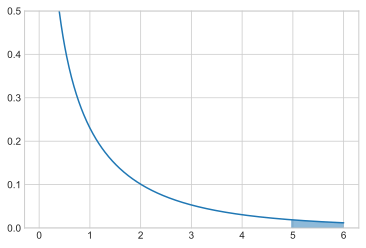

In [ ]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

plt.ylim(0, 0.5)

Считаем значение статистики:

In [ ]:
F = (R1 / k1) / ((1 - R1) / k2)
F

20.79065766838693

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

Теперь то же самое для второго примера.

In [ ]:
n = x2.shape[0]
m = x2.shape[1] - 1  # поскольку добавляли нулевой фактор

k1 = m
k2 = n - m - 1

k1, k2

(2, 3291)

Критическая область:

In [ ]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

2.9984608850665975

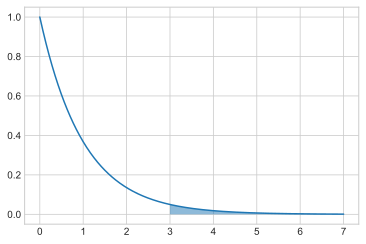

In [ ]:
ox = np.linspace(0, 7, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 7, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

Статистика:

In [ ]:
F = (R2 / k1) / ((1 - R2) / k2)
F

80.09373874411591

Второе уравнение регрессии также признаётся значимым.

__Доверительные интервалы для парной регрессии__

В случае парной регрессии можно построить доверительные интервалы для коэффициентов регрессии.

__Смысл__ доверительных интервалов тут в том, что, как мы уже отмечали ранее, модель линейной регрессии формально определена прямо для случайных величин, т.е. существуют какие-то _теоретические_ коэффициенты модели. В свою очередь, построенные нами (например, с помощью метода наименьших квадратов) коэффициенты представляют собой _оценки_ этих коэффициентов.

Таким образом, построив доверительные интервалы для этих коэффициентов, мы можем выяснить, насколько далеко могут быть реальные значения коэффициентов регрессии от построенных нами.

Начнём с коэффициента наклона $b_1$. Допустим, мы получили коэффициент наклона $\hat{b}_1$, и пусть $b_1$ — реальное значение этого коэффициента. Рассмотрим статистику
$$t = \dfrac{\hat{b}_1 - b_1}{S_{slope}},$$
где $S_{slope}$ — __стандартная ошибка коэффициента наклона__:
$$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}e_i^2}{\displaystyle\sum_{i=1}^n \left( x_i - \overline{X} \right)^2}}$$
Здесь $e_i$ — значение ошибки на $i$-м объекте, т.е. $e_i = y_i - z_i$.

Статистика $t$ имеет распределение Стьюдента с параметром $df = n - 2$. Отсюда можно, имея доверительную вероятность $p$, построить __доверительный интервал для коэффициента наклона__ по формуле:

$$P \left( \hat{b}_1 + t_{\alpha/2, \: n - 2} \cdot S_{slope} \leq b_1 \leq \hat{b}_1 + t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \right) = p,$$

где $\alpha = 1 - p$, $t_{x, n - 2}$ — квантиль порядка $x$ для распределения Стьюдента.

__Пример 6__

В примере 1 мы получили модель парной регрессии с коэффициентами:

In [ ]:
b0, b1

(77.8996282527881, 0.8717472118959109)

Построим для коэффициента наклона доверительный интервал.

In [ ]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [ ]:
s_slope = standard_error_slope(x1, y1, z1)
s_slope

0.19118616125822915

Зададим уровень доверия $p = 0.95$, т.е. $\alpha = 0.05$. Найдём нужные нам квантили.

In [ ]:
alpha = 0.05
n = x1.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 2)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 2)

t1, t2

(-2.2281388519649385, 2.2281388519649385)

Доверительный интервал для параметра $b_1$:

In [ ]:
b1_lower, b1_upper = (b1 + t1 * s_slope, b1 + t2 * s_slope)

b1_lower, b1_upper

(0.44575789803841653, 1.2977365257534053)

Этот интервал можно интерпретировать так: если у нас появятся новые данные из того же распределения, то с вероятностью $0.95$ модель линейной регрессии на этих новых данных будет иметь коэффициент наклона в пределах этого интервала.

__Пример 7__

Построим по границам доверительного интервала две дополнительные модели парной регрессии.

Text(0, 0.5, 'цена')

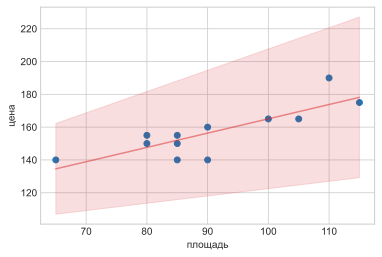

In [ ]:
plt.scatter(x1, y1)

ox = x1.copy()
ox.sort()

plt.plot(ox, b0 + b1 * ox, color='C3', alpha=0.5)
plt.fill_between(ox, b0 + b1_lower * ox, b0 + b1_upper * ox, color='C3', alpha=0.15)


plt.xlabel('площадь')
plt.ylabel('цена');

В соответствии с доверительным интервалом, маловероятно, что на новых данных модель парной регрессии выйдет за полученные границы.

Аналогичным образом можно построить доверительный интервал для коэффициента сдвига $b_0$. Как это делать — читайте в дополнительных материалах к уроку.

Кроме того, доверительные интервалы можно также строить и для коэффициентов многомерной регрессии (т.е. когда имеется несколько факторов). По этому поводу также имеется дополнительный материал.

__Резюме__

Итак, подытожим весь описанный выше регрессионный анализ и возникающие в процессе величины:
* Непосредственно факт наличия линейной взаимосвязи проверяется с помощью корреляционного анализа.
* Если линейная зависимость наблюдается, можно построить модель линейной регрессии. Она укажет на характер этой зависимости (т.е. на то, каким именно образом изменяется переменная под влиянием факторов).
* С помощью F-критерия Фишера можно проверить, является ли уровень зависимости в данных статистически значимым.
* С помощью доверительных интервалов можно оценить реальный вклад каждого фактора в изменение переменной.

### Двухвыборочный t-тест

Ранее с помощью распределения Стьюдента мы научились проверять гипотезы о математическом ожидании и о коэффициенте корреляции.

Распределение Стьюдента также можно применять для следующей __задачи__. Имеются две независимые выборки $X_1$, $X_2$, взятые, соответственно, из распределений $D_1$, $D_2$. Требуется проверить гипотезу о том, что математические ожидания двух соответствующих распределений равны, т.е.
$$H_0: \: M(D_1) = M(D_2)$$

Допустим, размеры выборок равны, соответственно, $n_1$ и $n_2$. Обозначим через
$$\sigma_\Delta = \sqrt{\dfrac{\sigma_{X_1}^2}{n_1} + \dfrac{\sigma_{X_2}^2}{n_2}}$$
среднее квадратическое отклонение разности между выборочными средними выборок $X_1$ и $X_2$. Здесь $\sigma_{X_i}^2$ — несмещённая оценка дисперсии по выборке $X_i$.

Для проверки данной гипотезы используется следующая __статистика__:
$$t = \dfrac{\overline{X_1} - \overline{X_2}}{\sigma_\Delta}$$

В предположении нулевой гипотезы данная статистика имеет распределение Стьюдента. Число степеней свободы распределения определяется из следующего равенства:
$$df = \dfrac{\left( \dfrac{\sigma_{X_1}^2}{n_1} + \dfrac{\sigma_{X_2}^2}{n_2} \right)^2}{\dfrac{\left( \sigma_{X_1}^2 / n_1 \right)^2}{n_1 - 1} + \dfrac{\left( \sigma_{X_2}^2 / n_2 \right)^2}{n_2 - 1}}$$

Дальнейшая процедура проверки гипотезы стандартна: выбирается уровень значимости $\alpha$, по нему строится двухсторонняя критическая область (с использованием квантилей $t_{x, \: df}$ распределения Стьюдента) и наконец проводится статистический тест.

__Пример 8__

Независимым образом получены две выборки из роста людей:

In [ ]:
x1 = np.array([169.6, 178.6, 175.3, 171.8, 169.8, 164.1, 179. , 162.9, 179.5,
               169.1, 173.7, 168.7, 182.9, 176.3, 156.9, 174.2, 187.2, 178.5])

x2 = np.array([180.3, 179.4, 178.3, 168.8, 151.4, 168.1, 169.1, 150. , 156.3,
               176.3, 163.5, 169.8, 177.5, 168. , 162.4, 167.3, 176.4, 166.1,
               164.9, 163.4, 163.2, 169.6, 160.9, 170.8])

Утверждается, что обе выборки взяты случайным образом из одной и той же генеральной совокупности. Проверьте это утверждение с помощью двухвыборочного t-теста.

Итак, по порядку. В первую очередь, посчитаем значение $\sigma_\Delta$:

In [ ]:
n1 = x1.size
n2 = x2.size

s1 = x1.std(ddof=1)
s2 = x2.std(ddof=1)

In [ ]:
s_delta = np.sqrt(s1 ** 2 / n1 + s2 ** 2 / n2)
s_delta

2.4248215967971274

Отсюда получаем значение статистики:

In [ ]:
t = (x1.mean() - x2.mean()) / s_delta

t

2.331213886103755

Зафиксируем уровень значимости $\alpha = 0.05$. Теперь нужно посчитать квантили распределения Стьюдента. Посчитаем число степеней свободы этого распределения:

In [ ]:
df = (s1 ** 2 / n1 + s2 ** 2 / n2) ** 2 / \
    ((s1 ** 2 / n1) ** 2 / (n1 - 1) + (s2 ** 2 / n2) ** 2 / (n2 - 1))

df

38.264950672414635

Теперь квантили:

In [ ]:
alpha = 0.05

t1 = stats.t.ppf(alpha / 2, df=df)
t2 = stats.t.ppf(1 - alpha / 2, df=df)

t1, t2

(-2.0239339487009755, 2.023933948700975)

Итак, критическая область имеет вид:
$$\Omega_\alpha = (-\infty, -2.02) \cup (2.02, \infty)$$

Значение статистики попало в критическую область. Гипотеза о равенстве математических ожиданий отвергается. Значит, утверждение о том, что обе выборки взяты случайным образом из одной и той же генеральной совокупности, ложно.

Для двухвыборочного t-теста существует готовая реализация `scipy.stats.ttest_ind`. В неё нужно подать поочерёдно каждую из выборок. Кроме того, если нет причин считать, что дисперсии распределений двух выборок равны, надо также указать аргумент `equal_var=False`.

Как обычно, данная функция возвращает значение статистики и P-значение теста.

In [ ]:
stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=2.331213886103755, pvalue=0.025107534360731)

### A/B-тестирование

__A/B-тестирование__ (или __сплит-тестирование__) — маркетинговый метод, который используется для оценки эффективности веб-страниц и управления ими.

При A/В-тестировании сравнивают страницы A и B, имеющие разные элементы дизайна (например, цвета кнопки заказа товара). На каждую страницу случайным образом запускают около $50\%$ аудитории сайта и затем сравнивают, какая страница показывает наибольший процент конверсии.

За нулевую гипотезу берётся предположение, что конверсия на страницах A и B не отличается. Соответственно, обратное утверждение берётся за альтернативную гипотезу.

Как правило, для проверки такой гипотезы как раз используется __двухвыборочный t-тест__.